In [1]:
import tensorflow.keras.backend as K
import multiprocessing

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import random
import logging

from gensim.models.word2vec import Word2Vec

from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import RegexpTokenizer

In [2]:
# Set random seed (for reproducibility)
np.random.seed(1000)

In [3]:
#dataset_location = './datasets/sarcasm_v2.csv'
dataset_location = './datasets/text_and_annorations.csv'
model_location = './word2vec/'

corpus = []
labels = []

In [4]:
#Shuffle the dataset

ip=open(dataset_location,'r', encoding="utf8")
next(ip)   #ignore the first row (label row)
li = ip.readlines()
random.shuffle(li)

#dataset_location = './datasets/shuffled_sarcasm_v2.csv'
dataset_location = './datasets/shuffled_text_and_annotations.csv'

fid = open(dataset_location, "w", encoding="utf8")
fid.writelines(li)
fid.close()

In [5]:
# Parse tweets and sentiments       
with open(dataset_location, 'r', encoding="utf8") as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    
    #skip the first line?
    #next(csvReader)
    
    for row in csvReader:
        #corpus.append(row[3] + " - " + row[4])
        corpus.append(row[1])

        #Sarcasm label, (0 = not sarcasm, 1 = sarcasm)
        #pol = 1 if row[1] == 'sarc' else 0
        pol = 1 if row[5] == 'Yes' else 0
        labels.append(pol)
        
print('Corpus size: {}'.format(len(corpus)))

Corpus size: 994


In [6]:
# Tokenize and stem
tkr = RegexpTokenizer('[a-zA-Z0-9@]+')
#stemmer = LancasterStemmer()

tokenized_corpus = []

for i, tweet in enumerate(corpus):
    #tokens = [stemmer.stem(t) for t in tkr.tokenize(tweet) if not t.startswith('@')]
    tokens = [t for t in tkr.tokenize(tweet) if not t.startswith('@')]
    tokenized_corpus.append(tokens)

In [7]:
# Gensim Word2Vec model
vector_size = 300
window_size = 10

In [8]:
# Create Word2Vec
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
word2vec = Word2Vec(sentences=tokenized_corpus,
                    size=vector_size, 
                    window=window_size, 
                    negative=20,
                    iter=50,
                    seed=1000,
                    workers=multiprocessing.cpu_count(),
                    sg=1)

2020-06-09 18:30:55,946 : INFO : collecting all words and their counts
2020-06-09 18:30:55,947 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-09 18:30:55,953 : INFO : collected 4545 word types from a corpus of 23411 raw words and 994 sentences
2020-06-09 18:30:55,953 : INFO : Loading a fresh vocabulary
2020-06-09 18:30:55,958 : INFO : effective_min_count=5 retains 636 unique words (13% of original 4545, drops 3909)
2020-06-09 18:30:55,959 : INFO : effective_min_count=5 leaves 17755 word corpus (75% of original 23411, drops 5656)
2020-06-09 18:30:55,962 : INFO : deleting the raw counts dictionary of 4545 items
2020-06-09 18:30:55,963 : INFO : sample=0.001 downsamples 72 most-common words
2020-06-09 18:30:55,964 : INFO : downsampling leaves estimated 11628 word corpus (65.5% of prior 17755)
2020-06-09 18:30:55,995 : INFO : estimated required memory for 636 words and 300 dimensions: 1844400 bytes
2020-06-09 18:30:55,996 : INFO : resetting layer weights


2020-06-09 18:31:00,240 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-09 18:31:00,255 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-09 18:31:00,256 : INFO : EPOCH - 15 : training on 23411 raw words (11655 effective words) took 0.3s, 41153 effective words/s
2020-06-09 18:31:00,269 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-09 18:31:00,381 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-09 18:31:00,517 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-09 18:31:00,523 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-09 18:31:00,524 : INFO : EPOCH - 16 : training on 23411 raw words (11614 effective words) took 0.3s, 44619 effective words/s
2020-06-09 18:31:00,530 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-09 18:31:00,632 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-0

2020-06-09 18:31:04,329 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-09 18:31:04,452 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-09 18:31:04,546 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-09 18:31:04,560 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-09 18:31:04,561 : INFO : EPOCH - 32 : training on 23411 raw words (11634 effective words) took 0.2s, 49630 effective words/s
2020-06-09 18:31:04,567 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-09 18:31:04,686 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-09 18:31:04,779 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-09 18:31:04,801 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-09 18:31:04,801 : INFO : EPOCH - 33 : training on 23411 raw words (11583 effective words) took 0.2s, 48979 effective words/s
2020-0

2020-06-09 18:31:08,536 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-09 18:31:08,537 : INFO : EPOCH - 48 : training on 23411 raw words (11576 effective words) took 0.2s, 47271 effective words/s
2020-06-09 18:31:08,546 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-09 18:31:08,668 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-09 18:31:08,756 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-09 18:31:08,782 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-09 18:31:08,782 : INFO : EPOCH - 49 : training on 23411 raw words (11575 effective words) took 0.2s, 47945 effective words/s
2020-06-09 18:31:08,788 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-09 18:31:08,877 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-09 18:31:09,032 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-0

In [9]:
# Copy word vectors and delete Word2Vec model and original corpus to save memory
X_vecs = word2vec.wv
#del word2vec
del corpus

In [10]:
# Train subset size (0 < size < len(tokenized_corpus))
train_size = math.floor(0.8 * len(tokenized_corpus))

# Test subset size (0 < size < len(tokenized_corpus) - train_size)
test_size = len(tokenized_corpus) - train_size

# Compute average and max tweet length
avg_length = 0.0
max_length = 0

for tweet in tokenized_corpus:
    if len(tweet) > max_length:
        max_length = len(tweet)
    avg_length += float(len(tweet))
    
print('Average tweet length: {}'.format(avg_length / float(len(tokenized_corpus))))
print('Max tweet length: {}'.format(max_length))

Average tweet length: 23.5523138832998
Max tweet length: 201


In [11]:
# Tweet max length (number of tokens)
max_tweet_length = max_length

In [12]:
# Create train and test sets
# Generate random indexes
indexes = set(np.random.choice(len(tokenized_corpus), train_size + test_size, replace=False))

X_train = np.zeros((train_size, max_tweet_length, vector_size), dtype=K.floatx())
Y_train = np.zeros((train_size, 2), dtype=np.int32)
X_test = np.zeros((test_size, max_tweet_length, vector_size), dtype=K.floatx())
Y_test = np.zeros((test_size, 2), dtype=np.int32)

for i, index in enumerate(indexes):
    for t, token in enumerate(tokenized_corpus[index]):
        if t >= max_tweet_length:
            break
        
        if token not in X_vecs:
            continue
    
        if i < train_size:
            X_train[i, t, :] = X_vecs[token]
        else:
            X_test[i - train_size, t, :] = X_vecs[token]
            
    if i < train_size:
        Y_train[i, :] = [1.0, 0.0] if labels[index] == 0 else [0.0, 1.0]
    else:
        Y_test[i - train_size, :] = [1.0, 0.0] if labels[index] == 0 else [0.0, 1.0] 

In [13]:
# Keras convolutional model
batch_size = 16
nb_epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(16, kernel_size=2, activation='relu', padding='same', input_shape=(max_tweet_length, vector_size)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(32, kernel_size=2, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(16, kernel_size=2, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 201, 16)           9616      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 32)           1056      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 16)            1040      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 25, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0

In [14]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Fit the model
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          shuffle=True,
          epochs=nb_epochs,
          validation_data=(X_test, Y_test))

Epoch 1/10
50/50 [==============================] - 1s 21ms/step - loss: 0.6313 - accuracy: 0.6491 - val_loss: 0.5997 - val_accuracy: 0.6432
Epoch 2/10
50/50 [==============================] - 1s 16ms/step - loss: 0.5894 - accuracy: 0.6604 - val_loss: 0.5696 - val_accuracy: 0.7789
Epoch 3/10
50/50 [==============================] - 1s 19ms/step - loss: 0.5231 - accuracy: 0.8138 - val_loss: 0.5229 - val_accuracy: 0.7889
Epoch 4/10
50/50 [==============================] - 1s 17ms/step - loss: 0.4380 - accuracy: 0.8818 - val_loss: 0.4776 - val_accuracy: 0.8191
Epoch 5/10
50/50 [==============================] - 1s 19ms/step - loss: 0.4080 - accuracy: 0.9082 - val_loss: 0.4643 - val_accuracy: 0.8241
Epoch 6/10
50/50 [==============================] - 1s 18ms/step - loss: 0.3835 - accuracy: 0.9358 - val_loss: 0.4543 - val_accuracy: 0.8543
Epoch 7/10
50/50 [==============================] - 1s 19ms/step - loss: 0.3660 - accuracy: 0.9497 - val_loss: 0.4561 - val_accuracy: 0.8442
Epoch 8/10
50

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)

print("Loss: ", "%.3f" % loss)
print("Accuracy: ", "%.3f" % accuracy)

7/7 [==============================] - 0s 9ms/step - loss: 0.4568 - accuracy: 0.8543
Loss:  0.457
Accuracy:  0.854


# Graph

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

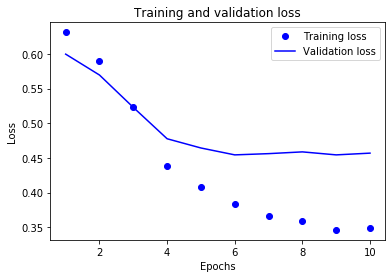

In [18]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

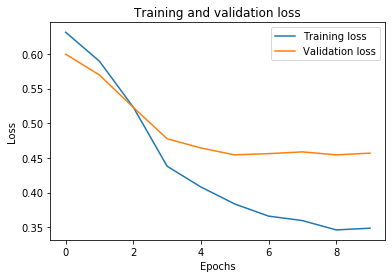

In [19]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();
plt.show()

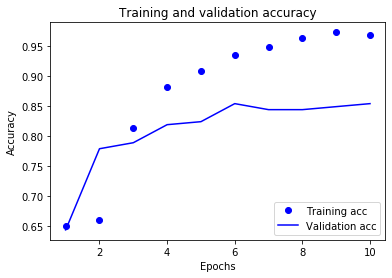

In [20]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

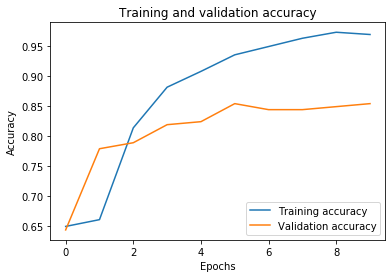

In [21]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Predictions

In [51]:
def evaluate_phrase(tweet, model, word2vec, max_length, vector_size):
    #Tokenisation
    tkr = RegexpTokenizer('[a-zA-Z0-9@]+')
    tokens = [t for t in tkr.tokenize(tweet) if not t.startswith('@')]
    
    vectorized_tweet = np.zeros((1,max_tweet_length, vector_size), dtype=K.floatx())
    
    for i, token in enumerate(tokens):
        if token in word2vec.wv.vocab:
            vectorized_tweet[0][i] = word2vec.wv.__getitem__(token)
        
    prediction = model.predict(vectorized_tweet)
    print("NS: {:.2f}%".format(prediction[0][0]*100) + " S: {:.2f}%".format(prediction[0][1]*100))
    print("Non sarcasm" if prediction[0][0]>prediction[0][1] else "Sarcasm")

In [52]:
evaluate_phrase("Let's downvote someone just for misunderstanding!", model, word2vec, max_tweet_length, vector_size)

NS: 0.27% S: 99.73%
Sarcasm
